In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [13]:
z = np.arange(-7, 7, 0.1)

In [14]:
phi_z = sigmoid(z)

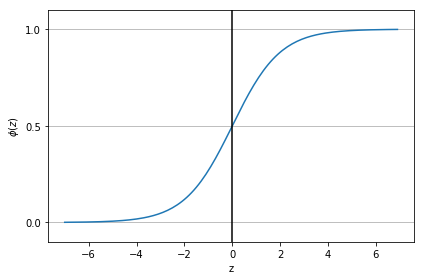

In [17]:
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [56]:
from IPython.display import Image
from sklearn import datasets
import numpy as np

In [57]:
iris = datasets.load_iris()

In [58]:
X = iris.data[:, [2, 3]]
y = iris.target

In [59]:
print('Class labels: ', np.unique(y))

Class labels:  [0 1 2]


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=1, stratify=y)

In [62]:
print('Labels counts in y: ', np.bincount(y))
print('Labels counts in y_train: ', np.bincount(y_train))
print('Labels counts in y_test', np.bincount(y_test))

Labels counts in y:  [50 50 50]
Labels counts in y_train:  [35 35 35]
Labels counts in y_test [15 15 15]


In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [32]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [47]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0],
                   y=X[y == c1, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=c1,
                   edgecolors='black')
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0],
                   X_test[:, 1],
                   c='',
                   edgecolors='black',
                   alpha=1.0,
                   linewidths=1,
                   marker='o',
                   s=100,
                   label='test set')

In [52]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent
    
    Parameters
    ----------
    eta: float
        learning rate (between 0.0. and 1.0)
    n_iter: int
        Passes over the training dataset.
    random_state: int
        Random number generator seed for random weight
        initialization.
    
    Attributes
    ----------
    w_: id-array
        Weighs after fitting
    cost_: list
        Sum-of-squares cost function value in each epoch.
        
    """
    
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Fit training data.
        
        Paramter
        --------
        x: {array-like}, shape = [n_samples, n_feature]
            Training vectors, where n_samples is the number of samples 
            n_features is the number of features.
        y: array-like, shape = [n_samples]
            Target values.
        
        Returns
        self: object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y  - output)
            self.w_[1:] = self.eta * X.T.dot(errors)
            self.w_[0] = self.eta * errors.sum()
            
            cost = -y.dot(np.log(output)) - ((1-y).dot(np.log(1 - output)))
            self.cost_.append(cost)
            return self
        
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
        

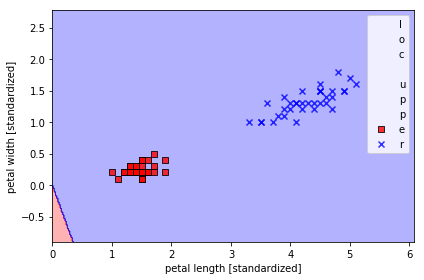

In [53]:
X_train_01_subnet = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subnet = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subnet, y_train_01_subnet)

plot_decision_regions(X=X_train_01_subnet,
                      y=y_train_01_subnet,
                      classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend('loc upper left')

plt.tight_layout()
plt.show()

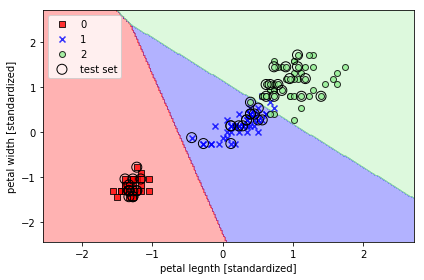

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, 
                      y_combined, 
                      classifier=lr, 
                      test_idx=range(105, 150))
plt.xlabel('petal legnth [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [66]:
lr.predict_proba(X_test_std[:3, :])

array([[3.20136878e-08, 1.46953648e-01, 8.53046320e-01],
       [8.34428069e-01, 1.65571931e-01, 4.57896429e-12],
       [8.49182775e-01, 1.50817225e-01, 4.65678779e-13]])

In [68]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [69]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [70]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [73]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

In [76]:
X_test_std[0, :].reshape(1, -1)

array([[0.89820289, 1.44465434]])

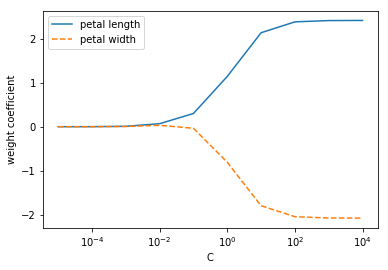

In [77]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()